# key words
- cluster: KMeans
- metrics: normalized_mutual_info_score

centers:
[[142.90268932 113.32104403  81.66536576]
 [196.74370719 166.82998855 118.86755459]
 [ 70.09281116  42.22922357  27.17703863]
 [125.33572044  81.80159338  46.24901924]
 [176.46983077 146.24502531 102.01169947]]
kmeans_norm_score = 0.4242


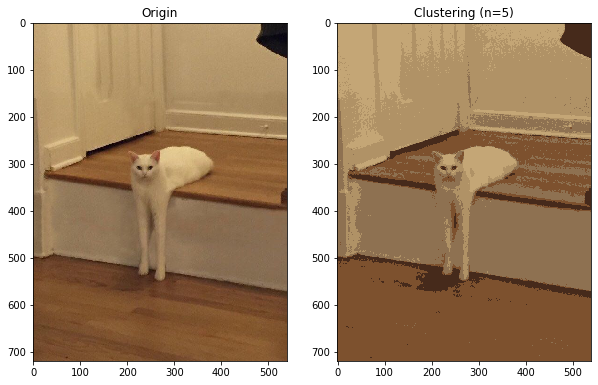

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.metrics import normalized_mutual_info_score

sample = img.imread("sample.jpg")
w, h, _ = sample.shape

sample_transform = sample.reshape(w * h, -1)

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(sample_transform)

# values of centers refer to average color depth
centers = kmeans.cluster_centers_
print("centers:\n%s" % centers)
centers = centers.astype(np.int)

labels = kmeans.labels_

sample_kmeans = centers[labels].reshape(w, h, -1)

# kmeans normalized
kmeans_norm_score = normalized_mutual_info_score(sample_transform[:, -1], labels, average_method='arithmetic')
print("kmeans_norm_score = %.4f" % kmeans_norm_score)

# plot
plt.figure(figsize=(10, 14))
plt.subplot(121, title="Origin")
plt.imshow(sample)
plt.subplot(122, title="Clustering (n=%d)" % n_clusters)
plt.imshow(sample_kmeans)
